In [ ]:
!pip install -qU  transformers sentence-transformers \
                 pinecone-client pinecone-text protobuf==3.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
sample_img_path = "/content/drive/MyDrive/extracted_images/image100_1.png"

In [ ]:
import json

f = open('data_class5.json')
data = json.load(f)
data

[{'image': ' ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 Advertised before Acceptance under section 20(1) ProvisoMUMBAI\nPHARMACEUTICALS, MEDICINES, INFANTS AND INVALIDS"" FOODS, DIETATIC PRODUCTS, DENTAL PREPARATIONS \nAND DISINFECTANTS, NATURAL HERBAL PREPARATIONS AND AYURVEDIC PRODUCTS.\n787'},
 {'image': 'PIROX  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 DEV PHARMACY P LTDDELHI\nMEDICINAL AND PHARMACEUTICAL PREPARATIONS\n788'},
 {'image': 'CALCIBON  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 ARENA LAB PVT. LIMITEDDELHI\nPHARMACEUTICALS MEDICINES FOR HUMAN PURPOSES( AYURVEDIC MEDICINES)\n789'},
 {'image': 'VOLIDOL  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 SCL MALHOTRADELHI\nPHARMACEUTICALS.\n790'},
 {'image': 'VETAFLAM  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 DR. K.S. SAWHNEYDELHI\nPHARMACEUTICAL 

In [ ]:
data[1]['image'].find('extracted_images')

-1

In [ ]:
for i in range(len(data)):
  data[i]['image'] = data[i]['image'].replace("\\" , "/")
  if(data[i]['image'].find('extracted_images') != -1) :
     data[i]['image'] = "/content/drive/MyDrive/" + data[i]['image']

data

[{'image': ' ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 Advertised before Acceptance under section 20(1) ProvisoMUMBAI\nPHARMACEUTICALS, MEDICINES, INFANTS AND INVALIDS"" FOODS, DIETATIC PRODUCTS, DENTAL PREPARATIONS \nAND DISINFECTANTS, NATURAL HERBAL PREPARATIONS AND AYURVEDIC PRODUCTS.\n787'},
 {'image': 'PIROX  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 DEV PHARMACY P LTDDELHI\nMEDICINAL AND PHARMACEUTICAL PREPARATIONS\n788'},
 {'image': 'CALCIBON  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 ARENA LAB PVT. LIMITEDDELHI\nPHARMACEUTICALS MEDICINES FOR HUMAN PURPOSES( AYURVEDIC MEDICINES)\n789'},
 {'image': 'VOLIDOL  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 SCL MALHOTRADELHI\nPHARMACEUTICALS.\n790'},
 {'image': 'VETAFLAM  ',
  'metadata': 'Trade Marks Journal No: 2109 ,   19/06/2023           Class 5 DR. K.S. SAWHNEYDELHI\nPHARMACEUTICAL 

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load a CLIP model from huggingface
model = SentenceTransformer(
    'sentence-transformers/clip-ViT-B-32',
    device=device
)
model

SentenceTransformer(
  (0): CLIPModel()
)

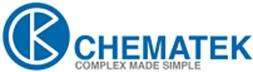

In [ ]:
from PIL import Image

data[1]['image'] = Image.open(data[1]['image'])
data[1]['image']

In [ ]:
dense_embeds = model.encode(data[1]['image'])
dense_embeds

array([ 1.35017470e-01,  6.48417950e-01, -2.93995321e-01,  2.51246765e-02,
        5.31132340e-01, -4.67301369e-01,  4.14468229e-01,  2.28820682e-01,
       -4.07954901e-02,  1.76622108e-01, -6.51819110e-02,  2.12626532e-01,
        2.47033924e-01,  1.51455924e-02, -4.25526291e-01,  2.38158368e-02,
        1.14057958e+00,  3.12433481e-01,  2.82739878e-01, -1.70633554e-01,
        5.00678718e-02,  2.49239758e-01, -1.67394578e-01, -1.05506070e-01,
       -1.09954357e-01, -2.73478627e-01,  1.69123381e-01,  2.85139292e-01,
        2.11382285e-03, -3.86855990e-01,  3.88510972e-02,  8.48717391e-02,
        1.96136042e-01, -1.56989649e-01, -2.11154014e-01, -1.46473825e-01,
       -1.57158598e-01, -1.18650131e-01, -1.97206214e-01, -1.29765463e+00,
        5.99168301e-01, -5.70297360e-01, -5.02581894e-01,  8.39894637e-02,
        1.81043625e-01, -1.37042713e+00,  3.17732692e-02,  1.92434996e-01,
       -4.40409034e-03, -3.32187861e-01, -3.06925744e-01, -7.12026507e-02,
        4.77258682e-01,  

# Pinecone

In [ ]:
import os
import pinecone

# initialize connection to pinecone (get API key at app.pinecone.io)
api_key = "4dcf3361-39e2-40ef-aa47-f0d71babe502"
# find your environment next to the api key in pinecone console
env = "asia-southeast1-gcp-free"

# init connection to pinecone
pinecone.init(
    api_key=api_key,
    environment=env
)

In [ ]:
index_name = "trademark-protection"
pinecone.create_index(
      index_name,
      dimension=512,
      metric="dotproduct",
      pod_type="s1"
    )

In [ ]:
index = pinecone.Index(index_name)

# Upserting Data to Pinecone

In [ ]:
image_data = []
for i in range(len(data)):
  image_data.append(data[i]['image'])

# image_data[1] = '/content/drive/MyDrive/extracted_images/image12_1.png'
image_data

[' ',
 'PIROX  ',
 'CALCIBON  ',
 'VOLIDOL  ',
 'VETAFLAM  ',
 '1223663    18/08/2003',
 'SIPLEVO  ',
 '/content/drive/MyDrive/extracted_images_class5/image8_1.png',
 '/content/drive/MyDrive/extracted_images_class5/image9_1.png',
 '/content/drive/MyDrive/extracted_images_class5/image10_1.png',
 'METAMEG  ',
 'PILO GUARD  ',
 'GENTACOM  ',
 'MEROMA  ',
 '/content/drive/MyDrive/extracted_images_class5/image15_1.png',
 'Otivet  ',
 '/content/drive/MyDrive/extracted_images_class5/image17_1.png',
 "GRACE' PILES-GO  ",
 'VALPLEX  ',
 'DERMA CLIN.AL  ',
 'Es-Carbazine  ',
 'Ruv ips  ',
 'AMITAKE FORTE  ',
 'OKNERVE  ',
 'AFLOA  ',
 'ALPHATONE  ',
 'ACNXT  ',
 'McMandhotra  ',
 'LEVOTAP  ',
 '/content/drive/MyDrive/extracted_images_class5/image30_1.png',
 '/content/drive/MyDrive/extracted_images_class5/image31_1.png',
 'DYNACURE  ',
 ' 4266511    16/08/2019',
 'TRUE-RED  ',
 '20 PLUS  ',
 'CHAKRA HERBALS  ',
 'Roson IV  ',
 'PayPay  ',
 'Maprovit  ',
 'Novabactum  ',
 'Vertipra relief  ',
 '/c

In [ ]:
for i in range(len(image_data)):
  isFile = os.path.isfile(image_data[i])
  if isFile:
    image_data[i] = Image.open(image_data[i])

In [ ]:
image_data

[' ',
 'PIROX  ',
 'CALCIBON  ',
 'VOLIDOL  ',
 'VETAFLAM  ',
 '1223663    18/08/2003',
 'SIPLEVO  ',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=792x265 at 0x7F79115D9300>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=147x72 at 0x7F79115D83D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=193x68 at 0x7F79115D8F10>,
 'METAMEG  ',
 'PILO GUARD  ',
 'GENTACOM  ',
 'MEROMA  ',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=314x97 at 0x7F7910F74E20>,
 'Otivet  ',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=314x219 at 0x7F7910F755D0>,
 "GRACE' PILES-GO  ",
 'VALPLEX  ',
 'DERMA CLIN.AL  ',
 'Es-Carbazine  ',
 'Ruv ips  ',
 'AMITAKE FORTE  ',
 'OKNERVE  ',
 'AFLOA  ',
 'ALPHATONE  ',
 'ACNXT  ',
 'McMandhotra  ',
 'LEVOTAP  ',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=237x59 at 0x7F7910F74EE0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x92 at 0x7F7910F77760>,
 'DYNACURE  ',
 ' 4266511    16/08/2019',
 'TRUE-RED  ',
 '20 

In [ ]:
from tqdm.auto import tqdm
import os
batch_size = 200

for i in tqdm(range(0, len(image_data), batch_size)):
    # find end of batch
    i_end = min(i+batch_size, len(image_data))

    # extract image batch
    img_batch = image_data[i:i_end]

    # create dense vectors
    dense_embeds = model.encode(img_batch).tolist()
    # create unique IDs
    ids = [str(x) for x in range(i, i_end)]

    upserts = []
    # loop through the data and create dictionaries for uploading documents to pinecone index
    for _id, dense in zip(ids, dense_embeds):
        upserts.append({
            'id': _id,
            'values': dense,
        })
    # upload the documents to the new hybrid index
    index.upsert(upserts)

# show index description after uploading the documents
index.describe_index_stats()

  0%|          | 0/10 [00:00<?, ?it/s]

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 1994}},
 'total_vector_count': 1994}

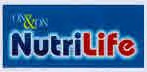

In [ ]:
image_data[8]

In [ ]:
queries = []
with open('trademarks.txt') as f:
    lines = f.readlines()
    queries.append(lines)

for i in range(len(queries[0])):
  queries[0][i]=queries[0][i].replace(' \n' , '')
  print(queries[0][i])

queries

A B C D E F
ABNZOLE BENEFICIALE CALSTRON
ACTIVE D3-120 EMIDOXYN FEOTAB
AEROCROM BENEFLORA CALCIZEM DECACID EMIDOXYN
PLUS FEREM
ALATAC BENOPA CARDIA
INTERVENTION

AL
THERAPEUTICS DEMIZON ETOGUD FERETTES
ALBUNEX Bio-Relyte CARDIANITRO DEPROFEN EVOMATE FERILIEX MALT
ALBUPHINE BIOTOB CEBECT DESATAX S EZESIM FEROBATE
ALUCAS BOLGAN CEFAGEN DESATAX-XL  FIBRALIP
AMADEUS BONEAL CEFERA O DEXTRAVEN  FILAZINE
AMLOTERVA BONEMATE CEFOUR DIABINAX  FLOPOL
APTIMUM BRAZIN CELLTROP DILNORM ER  FLORANORM
ASPIGREL  CELLTROPIN DILNORM SR  FLOXILLIN
ASPIGREL
LOADING  CEPHAGEN DILTIARIL  FRACSEAL
ASPISOL  CERTANE
FORTE RAPITAB DILTRIL  FTROP
AXIUM  CHLORSHRY DIPIMMUN  
AZITRAL  CINAMICA DOLCERA  
AZOSHRYA  CLEAN-O-

PALMS (class 3) DORS  
  COMPREHEM DROTASPAS  
  CONFEZ DSN  
  COSAKA DURASTAT  
  COVIPAUSE DURASTAT -
ASP  
  CRITINASE DURASTAT - EZ  
  CROMOFORT DURASTAT - F  
  CROMOTAC   
  CROMOTEC   
  CSN   
  CYCLOGEN   



 


[['A B C D E F',
  'ABNZOLE BENEFICIALE CALSTRON',
  'ACTIVE D3-120 EMIDOXYN FEOTAB',
  'AEROCROM BENEFLORA CALCIZEM DECACID EMIDOXYN',
  'PLUS FEREM',
  'ALATAC BENOPA CARDIA',
  'INTERVENTION\n',
  'AL',
  'THERAPEUTICS DEMIZON ETOGUD FERETTES',
  'ALBUNEX Bio-Relyte CARDIANITRO DEPROFEN EVOMATE FERILIEX MALT',
  'ALBUPHINE BIOTOB CEBECT DESATAX S EZESIM FEROBATE',
  'ALUCAS BOLGAN CEFAGEN DESATAX-XL  FIBRALIP',
  'AMADEUS BONEAL CEFERA O DEXTRAVEN  FILAZINE',
  'AMLOTERVA BONEMATE CEFOUR DIABINAX  FLOPOL',
  'APTIMUM BRAZIN CELLTROP DILNORM ER  FLORANORM',
  'ASPIGREL  CELLTROPIN DILNORM SR  FLOXILLIN',
  'ASPIGREL',
  'LOADING  CEPHAGEN DILTIARIL  FRACSEAL',
  'ASPISOL  CERTANE',
  'FORTE RAPITAB DILTRIL  FTROP',
  'AXIUM  CHLORSHRY DIPIMMUN  ',
  'AZITRAL  CINAMICA DOLCERA  ',
  'AZOSHRYA  CLEAN-O-\n',
  'PALMS (class 3) DORS  ',
  '  COMPREHEM DROTASPAS  ',
  '  CONFEZ DSN  ',
  '  COSAKA DURASTAT  ',
  '  COVIPAUSE DURASTAT -',
  'ASP  ',
  '  CRITINASE DURASTAT - EZ  ',
  '  CR

In [ ]:
query = queries[0][2]


dense = model.encode(query).tolist()
# search
result = index.query(
    top_k=5,
    vector=dense,
    include_metadata=True
)
# used returned product ids to get images
# imgs = [image_data[int(r["id"])] for r in result["matches"]]
imgs = []

for r in result["matches"]:
  if(int(r['score']) > 150):
    imgs.append(image_data[int(r["id"])])

In [ ]:
queries_result = []
for i in range(len(queries[0])):
  dense = model.encode(queries[0][i]).tolist()

  result = index.query(
    top_k=5,
    vector=dense,
    include_metadata=True
  )
  imgs = []

  for r in result["matches"]:
    if(int(r['score']) > 140):
      imgs.append(image_data[int(r["id"])])

  queries_result.append({
      queries[0][i] : imgs
  })

queries_result

[{'A B C D E F': ['OUSS  ',
   'Evaaide  ',
   'RP RESP  ',
   'TRONCEF  ',
   'GEVVUE  ']},
 {'ABNZOLE BENEFICIALE CALSTRON': []},
 {'ACTIVE D3-120 EMIDOXYN FEOTAB': []},
 {'AEROCROM BENEFLORA CALCIZEM DECACID EMIDOXYN': []},
 {'PLUS FEREM': ['OUSS  ',
   'TRONCEF  ',
   'RP RESP  ',
   'Evaaide  ',
   'DEFYGEST  ']},
 {'ALATAC BENOPA CARDIA': []},
 {'INTERVENTION\n': ['OUSS  ']},
 {'AL': []},
 {'THERAPEUTICS DEMIZON ETOGUD FERETTES': []},
 {'ALBUNEX Bio-Relyte CARDIANITRO DEPROFEN EVOMATE FERILIEX MALT': []},
 {'ALBUPHINE BIOTOB CEBECT DESATAX S EZESIM FEROBATE': []},
 {'ALUCAS BOLGAN CEFAGEN DESATAX-XL  FIBRALIP': []},
 {'AMADEUS BONEAL CEFERA O DEXTRAVEN  FILAZINE': []},
 {'AMLOTERVA BONEMATE CEFOUR DIABINAX  FLOPOL': []},
 {'APTIMUM BRAZIN CELLTROP DILNORM ER  FLORANORM': []},
 {'ASPIGREL  CELLTROPIN DILNORM SR  FLOXILLIN': []},
 {'ASPIGREL': []},
 {'LOADING  CEPHAGEN DILTIARIL  FRACSEAL': []},
 {'ASPISOL  CERTANE': []},
 {'FORTE RAPITAB DILTRIL  FTROP': []},
 {'AXIUM  CHLORSHRY D

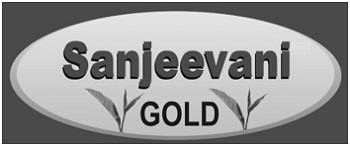

In [ ]:
image_data[3]